<a href="https://colab.research.google.com/github/wunderkimiko/sales-predictions/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [ ]:
spdf = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Data Sets/sales_predictions.csv')
spdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Filling missing weight values with mean weight
spdf['Item_Weight'] = spdf['Item_Weight'].fillna(spdf['Item_Weight'].mean())

In [ ]:
spdf['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Replacing LF and low fat to Low Fat
spdf['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat', inplace=True)

In [ ]:
spdf['Item_Fat_Content'].replace(to_replace='low fat', value='Low Fat', inplace=True)

In [ ]:
spdf['Item_Fat_Content'].replace(to_replace='reg', value='Regular', inplace=True)

In [ ]:
spdf['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
spdf['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [ ]:
# I will be dropping Outlet_Size because it is missing 2410 values and there is no way to average it as an object.
# I will be dropping Outlet_Establishment_Year and making Item_Identifier as index.
spdf.index = spdf['Item_Identifier']
spdf1 = spdf.drop(columns=['Item_Identifier','Outlet_Size'])
spdf1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [ ]:
spdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 732.4+ KB


In [ ]:
# I will be using Item_Outlet_Sales as my target vector
y = spdf1['Item_Outlet_Sales']
X = spdf1.drop(columns = 'Item_Outlet_Sales')

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# I will be one hot encoding object columns

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

obj_train = X_train.select_dtypes(include='object')
obj_test = X_test.select_dtypes(include='object')

ohe.fit(obj_train)

obj_train_ohe = ohe.transform(obj_train)
obj_test_ohe = ohe.transform(obj_test)

In [ ]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,
NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Tier 3,Supermarket Type2
FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Tier 3,Supermarket Type2
FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Tier 1,Supermarket Type1
FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Tier 2,Supermarket Type1
FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,Tier 3,Grocery Store
FDC41,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,Tier 2,Supermarket Type1
NCQ53,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,Tier 2,Supermarket Type1


In [ ]:
#Transforming array back to df

columns = ohe.get_feature_names(obj_train.columns)

obj_train_ohe = pd.DataFrame(obj_train_ohe, columns = columns)
obj_test_ohe = pd.DataFrame(obj_test_ohe, columns = columns)

obj_test_ohe

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_train = X_train.select_dtypes(include='number')
num_test = X_test.select_dtypes(include='number')

scaler.fit(num_train)

num_train_scaled = scaler.transform(num_train)
num_test_scaled = scaler.transform(num_test)

num_train_scaled = pd.DataFrame(num_train_scaled, columns = num_train.columns)
num_test_scaled = pd.DataFrame(num_test_scaled, columns = num_train.columns)

X_train_processed = pd.concat([num_train_scaled, obj_train_ohe], axis =1)
X_test_processed = pd.concat([num_test_scaled, obj_test_ohe], axis=1)

X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.819164,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.558258,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.129588,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.167286,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.530729,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_train

Item_Identifier
NCG06     515.3292
FDV57    3056.0220
FDM27    1577.9460
FDG24    1331.6000
FDD05    1687.1372
           ...    
FDY08     280.9676
FDC41    1301.6390
NCQ53    6145.3340
FDL46    1649.8524
NCN30     965.4100
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [ ]:
# Building decision tree model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
# fit model
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
#Predicting target values for training and test set
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.18028974928264285


In [ ]:
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
dec_tree.get_depth()

40

In [ ]:
max_depth_range = list(range(2,40))

In [ ]:
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = depth,
                                   random_state = 42)
  dec_tree.fit(X_train_processed, y_train)
  score = dec_tree.score(X_test_processed, y_test)
  r2.append(score)

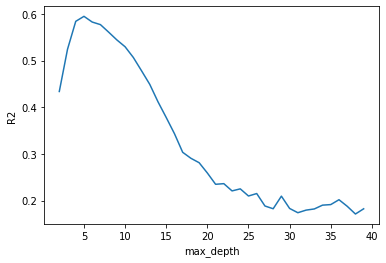

In [ ]:
#Visualizing which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
#final model r2
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train_processed, y_train)
train_6_score = dec_tree_6.score(X_train_processed, y_train)
test_6_score = dec_tree_6.score(X_test_processed, y_test)
print(train_6_score)
print(test_6_score)

0.6151611782156408
0.5825043788609139


In [ ]:
#2. #Build and evaluate a bagged tree model.
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
bagreg.fit(X_train_processed, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [ ]:
#evaluate mode performance
bagreg_train_score = bagreg.score(X_train_processed, y_train)
bagreg_test_score = bagreg.score(X_test_processed, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9190286099934135
0.5264073725351469


In [ ]:
# 3. #Build and evaluate a random forest model. 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#evaluate model performance
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9383415180902495
0.5575933896872239


In [ ]:
[estimator.get_depth() for estimator in rf.estimators_]

[33,
 35,
 37,
 30,
 36,
 41,
 36,
 36,
 36,
 34,
 35,
 38,
 34,
 35,
 33,
 31,
 38,
 35,
 32,
 39,
 32,
 36,
 34,
 34,
 33,
 37,
 39,
 33,
 33,
 38,
 35,
 36,
 35,
 31,
 35,
 31,
 38,
 38,
 39,
 32,
 35,
 35,
 35,
 31,
 33,
 34,
 35,
 37,
 35,
 32,
 36,
 41,
 38,
 38,
 34,
 32,
 35,
 33,
 31,
 34,
 34,
 34,
 31,
 37,
 36,
 34,
 35,
 32,
 31,
 34,
 37,
 33,
 40,
 33,
 31,
 37,
 36,
 33,
 39,
 34,
 37,
 31,
 37,
 35,
 36,
 38,
 34,
 38,
 37,
 34,
 36,
 33,
 32,
 33,
 35,
 32,
 34,
 36,
 33,
 42]

In [ ]:
rf_N = RandomForestRegressor(n_estimators = 40, random_state = 42)
rf_N.fit(X_train_processed, y_train)
rf_N_train_score = rf_N.score(X_train_processed, y_train)
rf_N_test_score = rf_N.score(X_test_processed, y_test)
print(rf_N_train_score)
print(rf_N_test_score)

0.9334389127077103
0.5513579081530712


In [ ]:
#Compare the performance of your models based on RMSE.  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Decision Tree MAE, MSE, RMSE
y_preddt = dec_tree.predict(X_test_processed)
print('Decision Tree MAE:', mean_absolute_error(y_test, y_preddt))
print('MSE:', mean_squared_error(y_test, y_preddt))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_preddt)))



Decision Tree MAE: 1050.4280671984984
MSE: 2255276.8336355835
RMSE: 1501.757914457448


In [ ]:
#Bagged Trees MAE, MSE, RMSE
y_predbf = bagreg.predict(X_test_processed)
print('Bagged Trees MAE:', mean_absolute_error(y_test, y_predbf))
print('MSE:', mean_squared_error(y_test, y_predbf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predbf)))

Bagged Trees MAE: 789.0430480337868
MSE: 1306631.3028482078
RMSE: 1143.079744745837


In [ ]:
#Random Forest MAE, MSE, RMSE
y_predrf = rf.predict(X_test_processed)
print('Random Forest MAE:', mean_absolute_error(y_test, y_predrf))
print('MSE:', mean_squared_error(y_test, y_predrf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predrf)))

Random Forest MAE: 769.2238598122947
MSE: 1220589.7898284784
RMSE: 1104.803054769708


In [ ]:
# I recommend the random forest model to predict sales since it has the lowest RMSE among the three models. 
# A lower RMSE score indicates that the model is better fitting. 

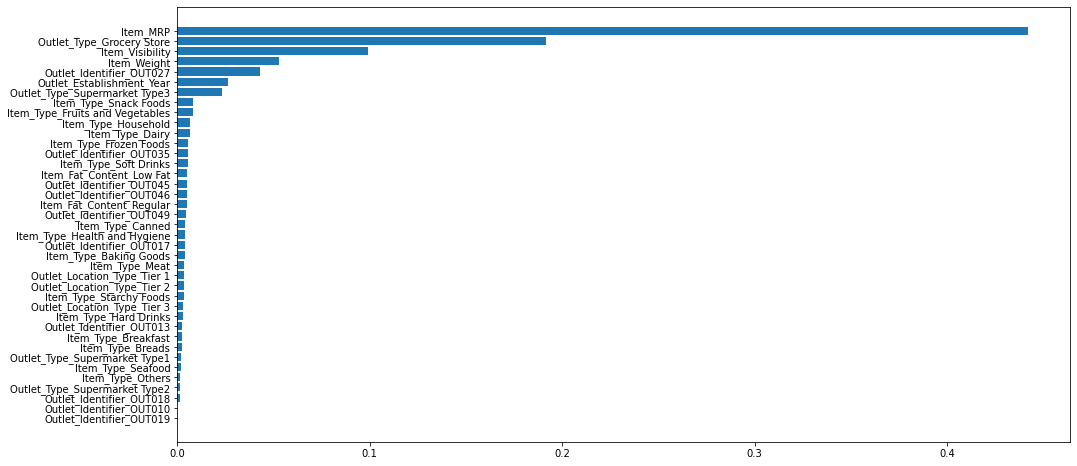

In [ ]:
features = pd.DataFrame({'feature': X_train_processed.columns,'feature_importance': rf.feature_importances_})
features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize = (16, 8))
plt.barh(features['feature'], features['feature_importance']);